In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table

Measurements = Base.classes.measurement

Stations = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()

print(most_recent_date)


('2017-08-23',)


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [18]:
# Calculate the date one year from the last date in data set.

one_year_prior_series = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

one_year_prior = one_year_prior_series[0]

print(one_year_prior)


2016-08-23 00:00:00


In [20]:
# Perform a query to retrieve the data and precipitation scores

measurements_query = session.query(Measurements).filter(Measurements.date > '2016-08-23').order_by(Measurements.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

measurements_df = pd.DataFrame([(mq.date, mq.prcp) for mq in measurements_query], columns=['date', 'precipitation'])

measurements_df.head()


,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [24]:
# Sort the dataframe by date

measurements_df.sort_values('date',inplace=True)

measurements_df.head()


,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


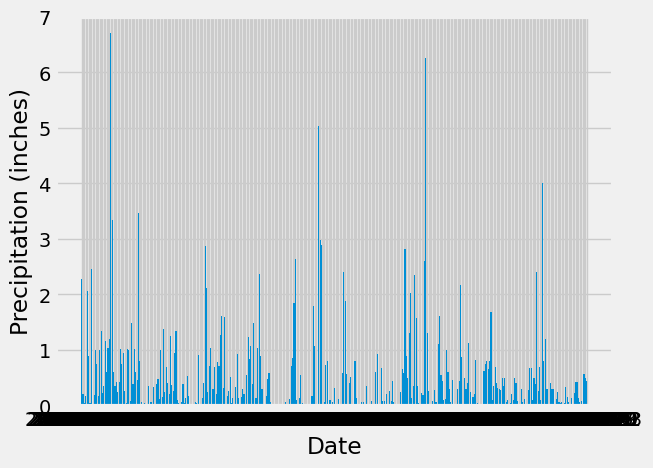

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(measurements_df['date'],measurements_df['precipitation'])
plt.ylim(0,7)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data

measurements_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(Stations).count()

print(total_stations)


9


In [29]:
# Alternate method for counting stations + preparing new dataframe for remaining analyses

measurements_query2 = session.query(Measurements).all()

new_measurement_df = pd.DataFrame([(mq.date, mq.tobs, mq.station) for mq in measurements_query2], columns=['date', 'temperature', 'station'])

total_stations2 = new_measurement_df['station'].nunique()

print(total_stations2)

new_measurement_df.head(10)


9


,date,temperature,station
0,2010-01-01,65.0,USC00519397
1,2010-01-02,63.0,USC00519397
2,2010-01-03,74.0,USC00519397
3,2010-01-04,76.0,USC00519397
4,2010-01-06,73.0,USC00519397
5,2010-01-07,70.0,USC00519397
6,2010-01-08,64.0,USC00519397
7,2010-01-09,68.0,USC00519397
8,2010-01-10,73.0,USC00519397
9,2010-01-11,64.0,USC00519397


In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows)?
# List the stations and their counts in descending order.

station_grouping_df = pd.DataFrame(new_measurement_df.groupby('station').size().sort_values(ascending=False)).reset_index()

station_grouping_df.rename(columns={station_grouping_df.columns[1]:'count'},inplace=True)

station_grouping_df.head(10)


,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = station_grouping_df['station'][0]

print(most_active_station)


most_active_station_df = new_measurement_df[new_measurement_df['station'] == most_active_station]

most_active_station_df.describe()


USC00519281


,temperature
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_past_year_df = most_active_station_df[most_active_station_df['date'] > '2016-08-23'].sort_values('date',ascending=False)

most_active_station_past_year_df.head(10)


,date,temperature,station
14958,2017-08-18,79.0,USC00519281
14957,2017-08-17,76.0,USC00519281
14956,2017-08-16,76.0,USC00519281
14955,2017-08-15,77.0,USC00519281
14954,2017-08-14,77.0,USC00519281
14953,2017-08-13,77.0,USC00519281
14952,2017-08-06,83.0,USC00519281
14951,2017-08-05,82.0,USC00519281
14950,2017-08-04,77.0,USC00519281
14949,2017-07-31,76.0,USC00519281


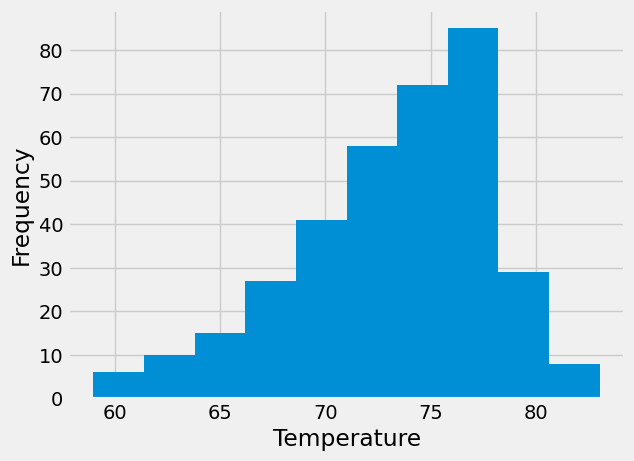

In [48]:
# Plot the histogram

plt.hist(most_active_station_past_year_df['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [49]:
# Close Session

session.close()
